In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xgboost

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import xgboost as xgb

In [4]:
df = pd.read_csv("fictional_character_battles_complex.csv")
df

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0
...,...,...,...,...,...,...,...,...
2346,Superman,DC Comics,9,8,5,Super Strength,Kryptonite,0
2347,Superman,DC Comics,2,5,8,Super Strength,Magic,1
2348,Flash,DC Comics,5,3,3,Telekinesis,Wooden Stake,0
2349,Batman,DC Comics,5,10,6,Flight,Wooden Stake,1


In [6]:
df.isna().sum()

Character           0
Universe            0
Strength            0
Speed               0
Intelligence        0
SpecialAbilities    0
Weaknesses          0
BattleOutcome       0
dtype: int64

In [8]:
df.duplicated().sum()

6

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(2345, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2345 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Character         2345 non-null   object
 1   Universe          2345 non-null   object
 2   Strength          2345 non-null   int64 
 3   Speed             2345 non-null   int64 
 4   Intelligence      2345 non-null   int64 
 5   SpecialAbilities  2345 non-null   object
 6   Weaknesses        2345 non-null   object
 7   BattleOutcome     2345 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 164.9+ KB


In [12]:
df.describe()

,Strength,Speed,Intelligence,BattleOutcome
count,2345.000000,2345.000000,2345.000000,2345.000000
mean,5.441365,5.481450,5.550107,0.278038
std,2.896110,2.858841,2.861892,0.448128
min,1.000000,1.000000,1.000000,0.000000
25%,3.000000,3.000000,3.000000,0.000000
50%,5.000000,6.000000,6.000000,0.000000
75%,8.000000,8.000000,8.000000,1.000000
max,10.000000,10.000000,10.000000,1.000000


In [13]:
df.head()

,Character,Universe,Strength,Speed,Intelligence,SpecialAbilities,Weaknesses,BattleOutcome
0,Wonder Woman,Marvel,7,8,3,Telekinesis,Kryptonite,0
1,Iron Man,Marvel,4,7,9,Telekinesis,Kryptonite,0
2,Iron Man,DC Comics,8,7,5,Telekinesis,Magic,0
3,Spider-Man,DC Comics,5,6,10,Telekinesis,Kryptonite,0
4,Flash,Marvel,7,6,2,Invisibility,Magic,0


In [15]:
df["Character"].value_counts()

Character
Wonder Woman       310
Superman           307
Iron Man           306
Thor               298
Flash              293
Batman             279
Spider-Man         276
Captain America    276
Name: count, dtype: int64

In [16]:
df["Universe"].value_counts()

Universe
Marvel       1191
DC Comics    1154
Name: count, dtype: int64

In [17]:
df["Strength"].value_counts()

Strength
1     255
5     249
3     238
2     237
10    235
8     234
7     228
9     226
6     224
4     219
Name: count, dtype: int64

In [18]:
df["Speed"].value_counts()

Speed
6     255
8     251
3     248
1     248
4     237
9     231
5     227
10    222
7     218
2     208
Name: count, dtype: int64

In [19]:
df["Intelligence"].value_counts()

Intelligence
7     264
10    257
6     255
2     242
4     235
5     224
3     221
1     219
9     217
8     211
Name: count, dtype: int64

In [20]:
df["SpecialAbilities"].value_counts()

SpecialAbilities
Invisibility      611
Flight            592
Telekinesis       572
Super Strength    570
Name: count, dtype: int64

In [21]:
df["Weaknesses"].value_counts()

Weaknesses
Kryptonite      636
Wooden Stake    590
Magic           562
Silver          557
Name: count, dtype: int64

In [22]:
df["BattleOutcome"].value_counts()

BattleOutcome
0    1693
1     652
Name: count, dtype: int64

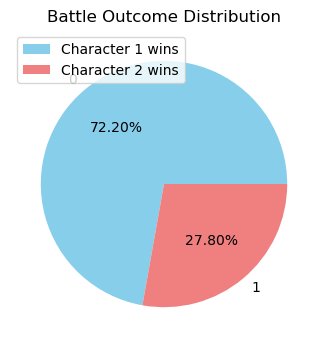

In [38]:
# Battle Outcome Distribution
plt.figure(figsize=(6, 4))
df['BattleOutcome'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'lightcoral'])
plt.title('Battle Outcome Distribution')
plt.ylabel('')
plt.legend(['Character 1 wins', 'Character 2 wins'], loc='best')
plt.show()

## Checking Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2239404c650>,
 'caps': [<matplotlib.lines.Line2D at 0x2239404de10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2239403f910>],
 'medians': [<matplotlib.lines.Line2D at 0x2239404ed10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2239404f710>],
 'means': []}

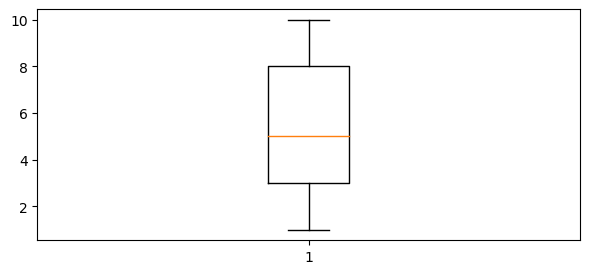

In [40]:
plt.figure(figsize=(7,3))
plt.boxplot(df["Strength"])

{'whiskers': [<matplotlib.lines.Line2D at 0x2239375e450>,
 'caps': [<matplotlib.lines.Line2D at 0x2239375f650>,
 'boxes': [<matplotlib.lines.Line2D at 0x2239375da50>],
 'medians': [<matplotlib.lines.Line2D at 0x223937707d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22393770f10>],
 'means': []}

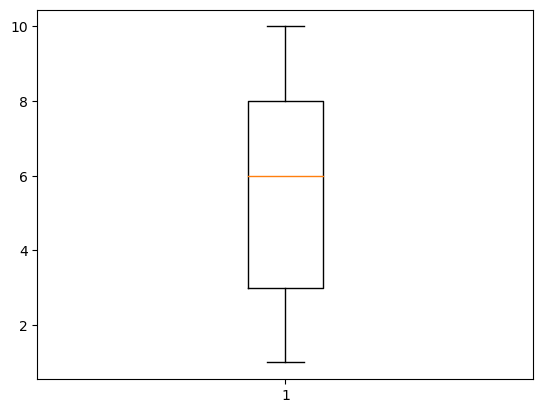

In [25]:
plt.boxplot(df["Speed"])

{'whiskers': [<matplotlib.lines.Line2D at 0x223937bd4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x223937be7d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x223937bcb90>],
 'medians': [<matplotlib.lines.Line2D at 0x223937bfa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x223937c8290>],
 'means': []}

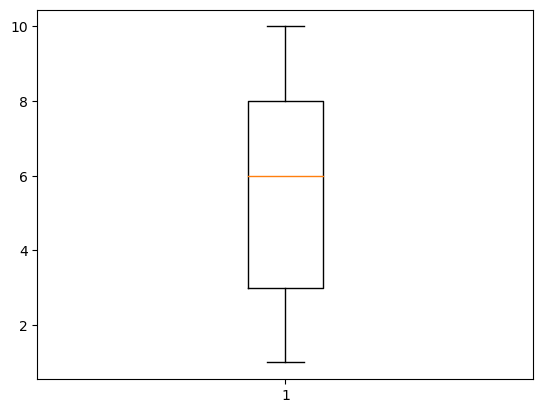

In [26]:
plt.boxplot(df["Intelligence"])

In [27]:
label_encoder = LabelEncoder()
df['Character'] = label_encoder.fit_transform(df['Character'])
df['Universe'] = label_encoder.fit_transform(df['Universe'])
df['SpecialAbilities'] = label_encoder.fit_transform(df['SpecialAbilities'])
df['Weaknesses'] = label_encoder.fit_transform(df['Weaknesses'])

X = df.drop('BattleOutcome', axis=1)
y = df['BattleOutcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\akans\AppData\Local\Temp\ipykernel_32792\3765935869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Character'] = label_encoder.fit_transform(df['Character'])
C:\Users\akans\AppData\Local\Temp\ipykernel_32792\3765935869.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Universe'] = label_encoder.fit_transform(df['Universe'])
C:\Users\akans\AppData\Local\Temp\ipykernel_32792\3765935869.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

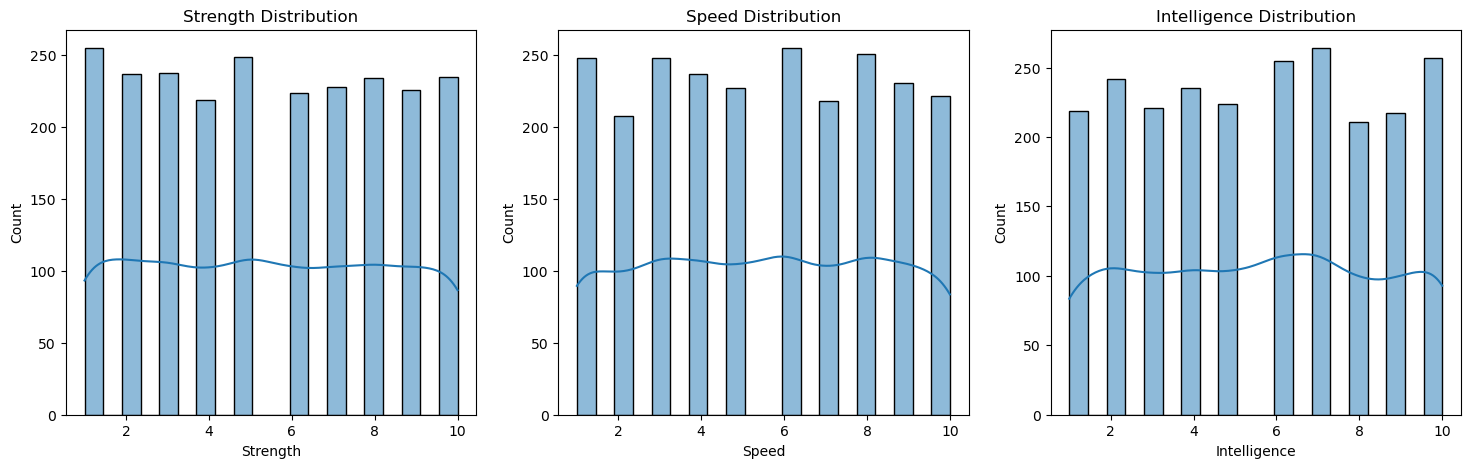

In [32]:
# Plot distributions of Strength, Speed, and Intelligence
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Strength'], bins=20, kde=True, ax=axes[0]).set_title('Strength Distribution')
sns.histplot(df['Speed'], bins=20, kde=True, ax=axes[1]).set_title('Speed Distribution')
sns.histplot(df['Intelligence'], bins=20, kde=True, ax=axes[2]).set_title('Intelligence Distribution')
plt.show()

In [28]:
log_reg = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(random_state=42)

log_reg.fit(X_train_scaled, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
xgb_clf.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log_reg))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("XGBoost Performance:")
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       339
           1       0.60      0.45      0.51       130

    accuracy                           0.77       469
   macro avg       0.71      0.67      0.68       469
weighted avg       0.75      0.77      0.75       469

Confusion Matrix:
[[301  38]
 [ 72  58]]
Accuracy: 0.7654584221748401
Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       339
           1       0.48      0.47      0.47       130

    accuracy                           0.71       469
   macro avg       0.64      0.64      0.64       469
weighted avg       0.71      0.71      0.71       469

Confusion Matrix:
[[272  67]
 [ 69  61]]
Accuracy: 0.7100213219616205
Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       339
          

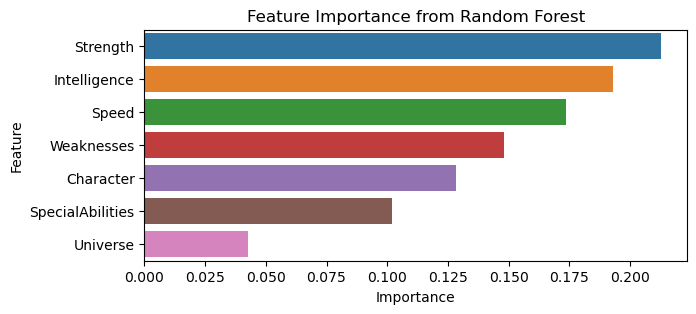

In [41]:
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7, 3))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()

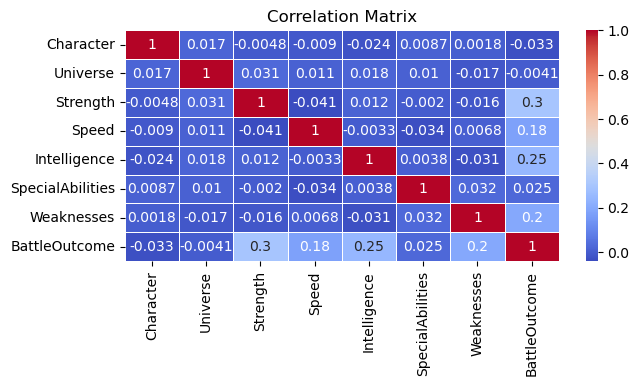

In [42]:
corr_matrix = df.corr()

plt.figure(figsize=(7, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_log_reg = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_log_reg.fit(X_train, y_train)

print("Best parameters found: ", grid_search_log_reg.best_params_)
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_best_log_reg = best_log_reg.predict(X_test)
print("Accuracy of the best Logistics Regression model: ", accuracy_score(y_test, y_pred_best_rf))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy of the best Logistics Regression model:  0.7697228144989339


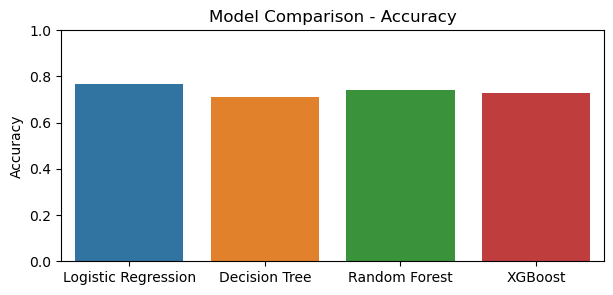

In [43]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_xgb)
]

plt.figure(figsize=(7, 3))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

### Summary
In this notebook, we performed an in-depth analysis of a fictional character battle dataset. The key steps included:

1) Data Preprocessing: Handled missing values and encoded categorical variables. /n
2) Predictive Modeling: Built and evaluated multiple machine learning models (Logistic Regression, Decision Tree, Random Forest, XGBoost). /n
3) Feature Importance Analysis: Identified the most significant attributes influencing battle outcomes. /n
4) Advanced Analysis: Conducted correlation analysis and hyperparameter tuning, and compared the performance of different models.

### Conclusion

* Logistics Regression emerged as the best model for predicting battle outcomes, especially after hyperparameter tuning.
* Strength and Intelligence were identified as key attributes influencing battle outcomes.


This analysis provides a comprehensive approach to understanding the dynamics of fictional character battles and highlights the importance of various attributes in determining the outcomes.